<a href="https://colab.research.google.com/github/sparks-baird/self-driving-lab-demo/blob/main/notebooks/7.2.1-hivemq-openssl-certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HiveMQ OpenSSL Certificate Generation for MicroPython
- https://www.hivemq.com/docs/hivemq-cloud/introduction.html#connect-client
- https://community.hivemq.com/t/getting-started-raspberry-pi-pico-w/1316/21?page=2
- https://github.com/sparks-baird/self-driving-lab-demo/blob/main/src/public_mqtt_sdl_demo/main.py

**NOTE:** Unless you are using the public test credentials for testing purposes, you will need to replace `host` with your own hostname, since certificates are not transferrable for different brokers. On HiveMQ Cloud, these used to be transferrable, but no longer are. See [this community.hivemq.com post](https://community.hivemq.com/t/getting-started-raspberry-pi-pico-w/1316/30?u=sgbaird) for details.

In [11]:
# dummy host name: "1234abc5678def91011ghi1213.s2.eu.hivemq.cloud"
host = "248cc294c37642359297f75b7b023374.s2.eu.hivemq.cloud" #@param {type:"string"}
port = 8883 #@param {type:"integer"}

In [12]:
!openssl s_client -connect {host}:{port} -showcerts < /dev/null 2> /dev/null > hivemq-output.txt

In [13]:
with open("hivemq-output.txt", "r") as f:
  txt = f.read()
print(txt)

CONNECTED(00000003)
---
Certificate chain
 0 s:CN = *.s2.eu.hivemq.cloud
   i:C = US, O = Let's Encrypt, CN = R11
   a:PKEY: rsaEncryption, 2048 (bit); sigalg: RSA-SHA256
   v:NotBefore: Jun 10 12:14:04 2024 GMT; NotAfter: Sep  8 12:14:03 2024 GMT
-----BEGIN CERTIFICATE-----
MIIFCzCCA/OgAwIBAgISA5nMCd81+6JyApqpjOjYScV6MA0GCSqGSIb3DQEBCwUA
MDMxCzAJBgNVBAYTAlVTMRYwFAYDVQQKEw1MZXQncyBFbmNyeXB0MQwwCgYDVQQD
EwNSMTEwHhcNMjQwNjEwMTIxNDA0WhcNMjQwOTA4MTIxNDAzWjAfMR0wGwYDVQQD
DBQqLnMyLmV1LmhpdmVtcS5jbG91ZDCCASIwDQYJKoZIhvcNAQEBBQADggEPADCC
AQoCggEBAMSjskkjT3lienCFm5ptT7HN1Zi/2CviuTWY9hpTiSWjCqKW+stAPFe8
MmDNJGoiHuHxn3S8UisKBa0l3vILJmjpIHVO9+DsHjhgj2lN1tGYyKmc0c4aU/BW
Pc4/DZaWaVf0Bm25mAjsumHwIsaWddC/S9YO+AjvTOhrn+9Og34PRNTuDeSMFkK9
YmL9Yb3a9bUx5W5Y9A3BVbvp2GidESD7Ih7d5X5XaYVxrsNaSBKbr+tQ9dtX7q2a
kA96J1sNaEN3lISWFCP5yqqzUsq2A872HJHczp54rf5QriagM5hXWLxJsh75lsEu
xxjhGCojmI7VpK3yurIhLNqapP8zjWkCAwEAAaOCAiswggInMA4GA1UdDwEB/wQE
AwIFoDAdBgNVHSUEFjAUBggrBgEFBQcDAQYIKwYBBQUHAwIwDAYDVR0TAQH/BAIw
ADAdBgNVH

In [14]:

begin_str = "-----BEGIN CERTIFICATE-----"
end_str = "-----END CERTIFICATE-----"
occurrence = 1 # second
server_cert = txt.split(begin_str)[occurrence + 1].split(end_str)[0]

pem_fpath = "hivemq-com-chain.pem"
with open(pem_fpath, "w") as f:
  f.write(begin_str)
  f.write(server_cert)
  f.write(end_str)

with open(pem_fpath, "r") as f:
  print(f.read())

-----BEGIN CERTIFICATE-----
MIIFBjCCAu6gAwIBAgIRAIp9PhPWLzDvI4a9KQdrNPgwDQYJKoZIhvcNAQELBQAw
TzELMAkGA1UEBhMCVVMxKTAnBgNVBAoTIEludGVybmV0IFNlY3VyaXR5IFJlc2Vh
cmNoIEdyb3VwMRUwEwYDVQQDEwxJU1JHIFJvb3QgWDEwHhcNMjQwMzEzMDAwMDAw
WhcNMjcwMzEyMjM1OTU5WjAzMQswCQYDVQQGEwJVUzEWMBQGA1UEChMNTGV0J3Mg
RW5jcnlwdDEMMAoGA1UEAxMDUjExMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIB
CgKCAQEAuoe8XBsAOcvKCs3UZxD5ATylTqVhyybKUvsVAbe5KPUoHu0nsyQYOWcJ
DAjs4DqwO3cOvfPlOVRBDE6uQdaZdN5R2+97/1i9qLcT9t4x1fJyyXJqC4N0lZxG
AGQUmfOx2SLZzaiSqhwmej/+71gFewiVgdtxD4774zEJuwm+UE1fj5F2PVqdnoPy
6cRms+EGZkNIGIBloDcYmpuEMpexsr3E+BUAnSeI++JjF5ZsmydnS8TbKF5pwnnw
SVzgJFDhxLyhBax7QG0AtMJBP6dYuC/FXJuluwme8f7rsIU5/agK70XEeOtlKsLP
Xzze41xNG/cLJyuqC0J3U095ah2H2QIDAQABo4H4MIH1MA4GA1UdDwEB/wQEAwIB
hjAdBgNVHSUEFjAUBggrBgEFBQcDAgYIKwYBBQUHAwEwEgYDVR0TAQH/BAgwBgEB
/wIBADAdBgNVHQ4EFgQUxc9GpOr0w8B6bJXELbBeki8m47kwHwYDVR0jBBgwFoAU
ebRZ5nu25eQBc4AIiMgaWPbpm24wMgYIKwYBBQUHAQEEJjAkMCIGCCsGAQUFBzAC
hhZodHRwOi8veDEuaS5sZW5jci5vcmcvMBMGA1UdIAQMMAowCAYGZ4EMAQIBMC

In [15]:
der_fpath = "hivemq-com-chain.der"
!openssl x509 -in {pem_fpath} -out {der_fpath} -outform DER

Download the file and upload it to the microcontroller.

In [ ]:
import sys

if 'google.colab' in sys.modules:
    from google.colab import files
    files.download('hivemq-com-chain.der')

NOTE: If the above cell doesn't work in Google Colab, you can download `hivemq-com-chain.der` using the left navigation bar by **hovering over the file**, clicking the three vertical dots, and clicking "download", as shown below. If you don't see the file, you may need to click the refresh icon near the top of the sidebar.

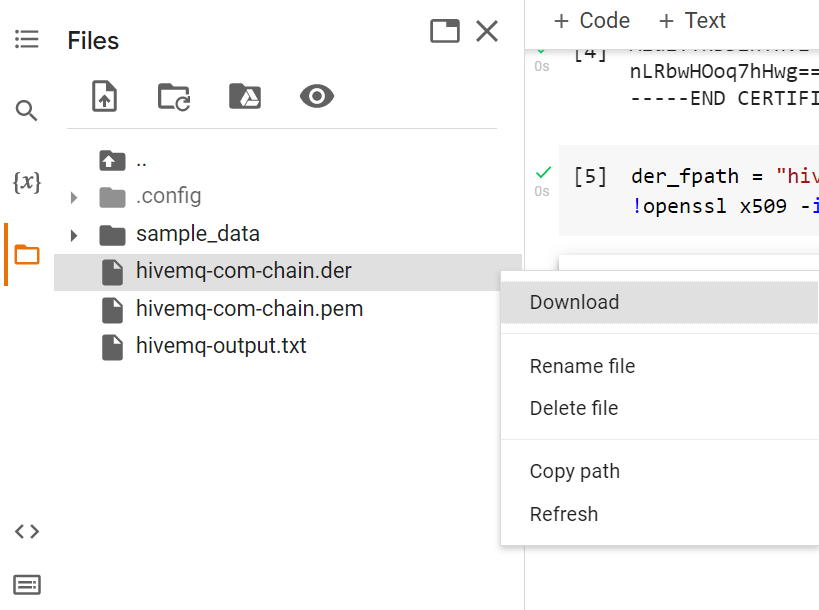